## Data Mining Part 2: Data Analysis

Okay, now that we have our finalized dataset, let's get to mining it

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import pickle

In [6]:
df = pd.read_csv("dataset_final.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   datetime              2049 non-null   datetime64[ns, UTC+08:00]
 1   visibility            2049 non-null   float64                  
 2   Temperature           2049 non-null   float64                  
 3   Relative Temperature  2049 non-null   float64                  
 4   Min Temperature       2049 non-null   float64                  
 5   Max Temperature       2049 non-null   float64                  
 6   pressure              2049 non-null   float64                  
 7   humidity              2049 non-null   float64                  
 8   Wind Speed            2049 non-null   float64                  
 9   Cloudiness            2049 non-null   float64                  
 10  weather               2049 non-null   object                

## Correlation Heat Map

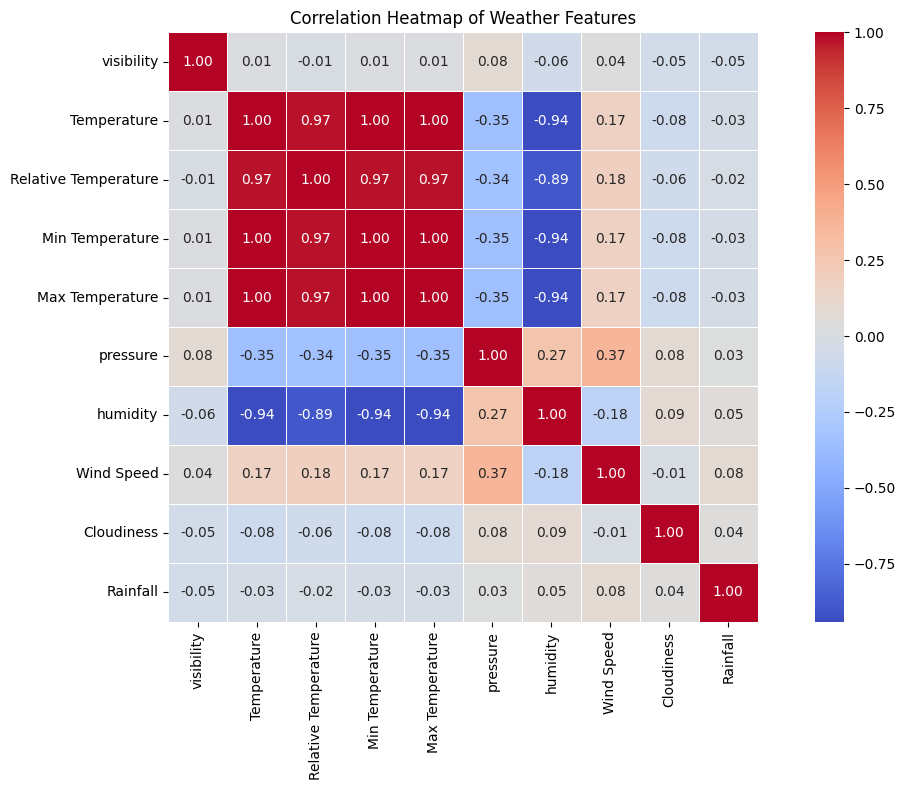

In [32]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Weather Features")
plt.tight_layout()
plt.show()

In [33]:
df[['Temperature', 'Relative Temperature', 'humidity']].corr()

,Temperature,Relative Temperature,humidity
Temperature,1.000000,0.974017,-0.940508
Relative Temperature,0.974017,1.000000,-0.889673
humidity,-0.940508,-0.889673,1.000000


## Temperature

### Average vs Relative

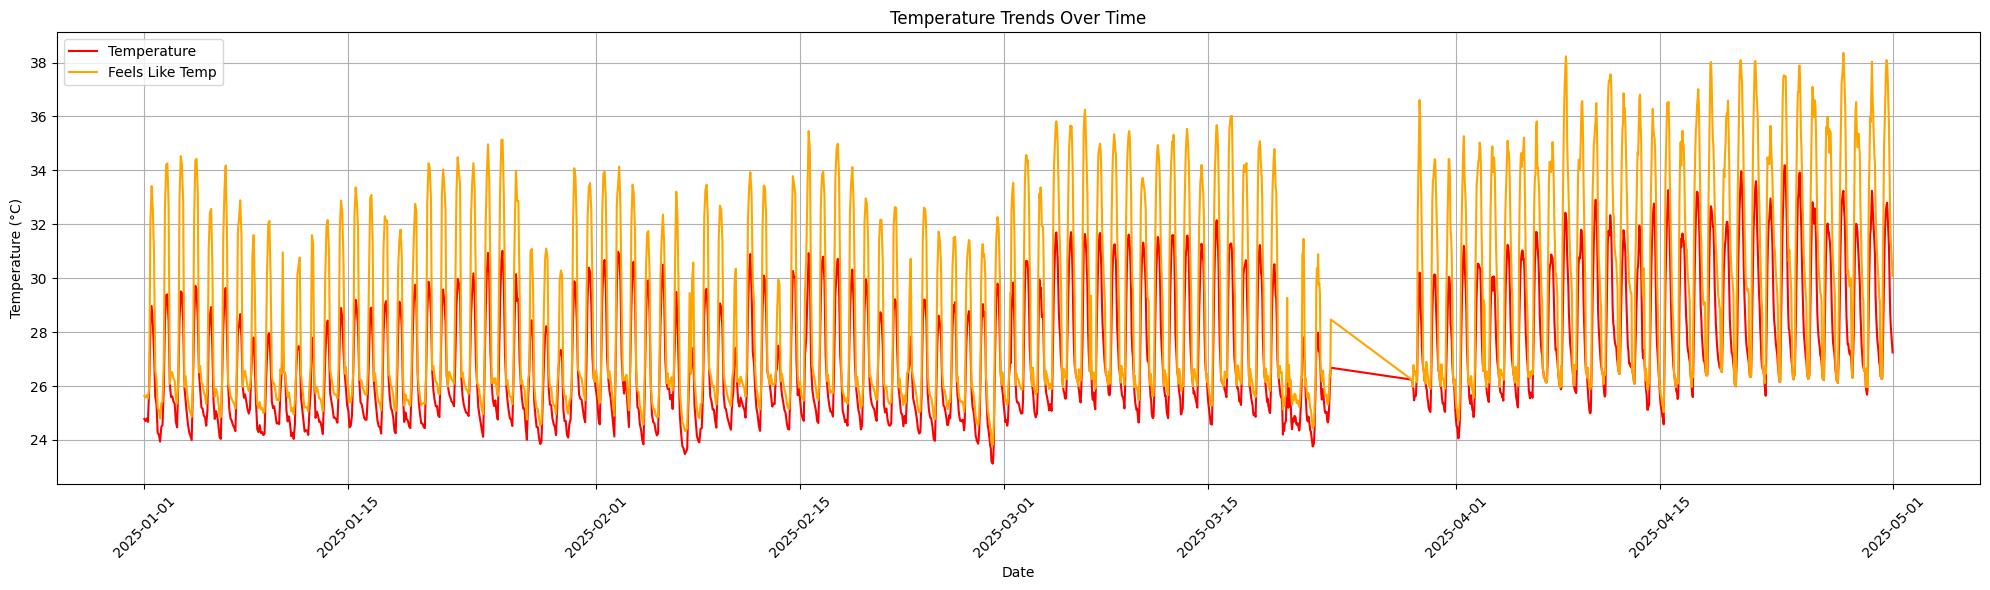

In [16]:
plt.figure(figsize=(20, 6))
plt.plot(df['datetime'], df['Temperature'], label='Temperature', color='red')
plt.plot(df['datetime'], df['Relative Temperature'], label='Feels Like Temp', color='orange')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Min vs Max

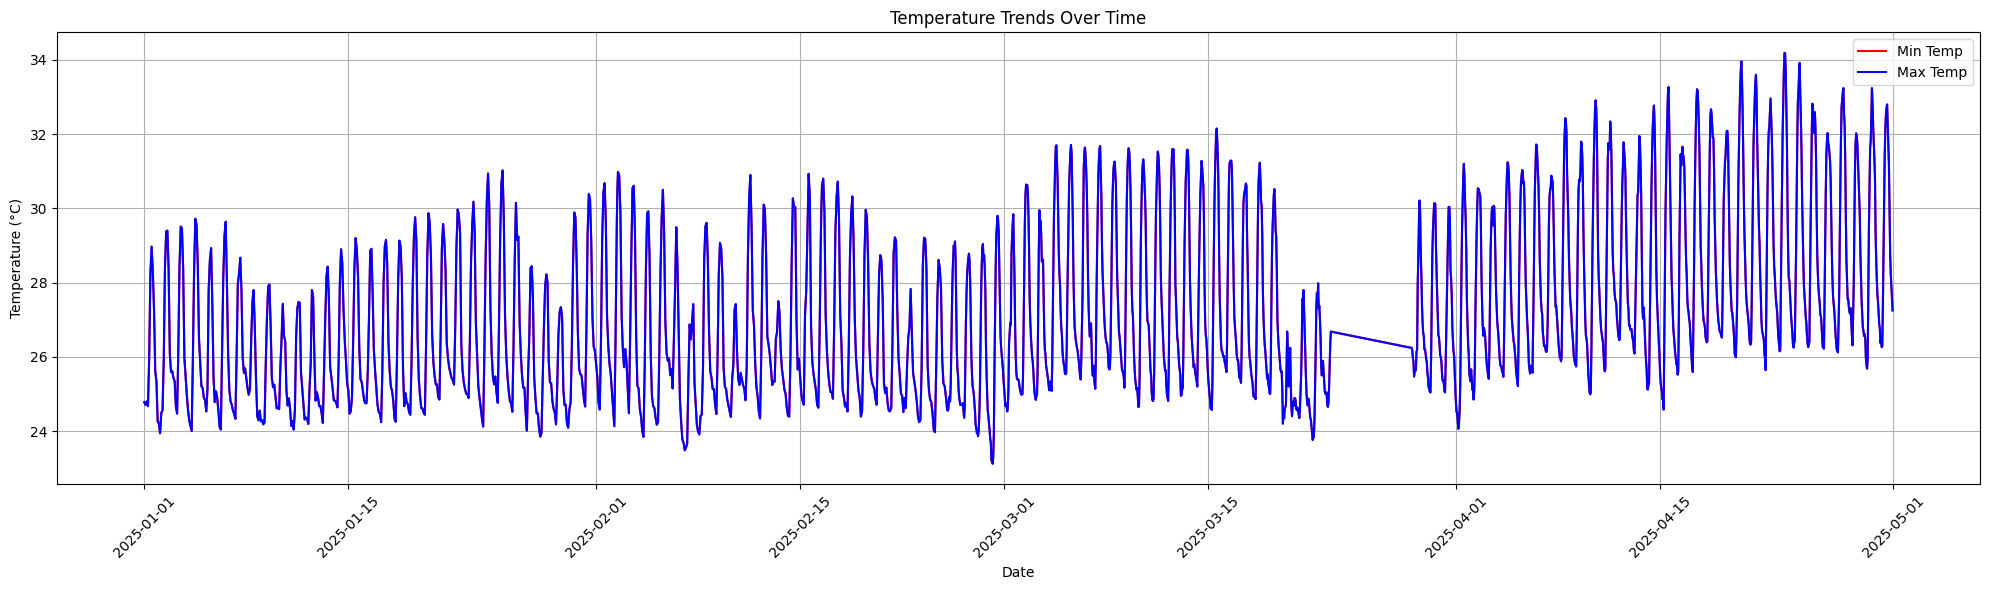

In [17]:
plt.figure(figsize=(20, 6))
plt.plot(df['datetime'], df['Min Temperature'], label='Min Temp', color='red')
plt.plot(df['datetime'], df['Max Temperature'], label='Max Temp', color='blue')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Binning and Bar Plot

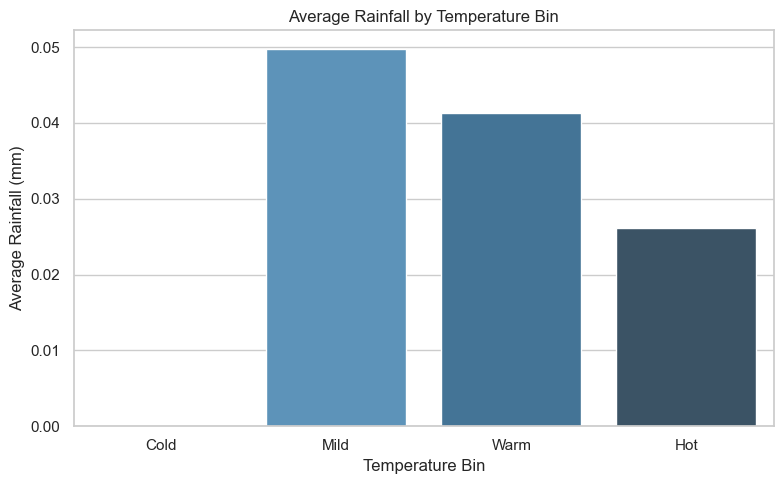

In [47]:
df['Temp_Bin'] = pd.cut(df['Temperature'], bins=[-np.inf, 20, 25, 30, np.inf],labels=['Cold', 'Mild', 'Warm', 'Hot'])
sns.set(style="whitegrid")
rain_by_temp = df.groupby('Temp_Bin')['Rainfall'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=rain_by_temp, x='Temp_Bin', y='Rainfall', palette='Blues_d')
plt.title('Average Rainfall by Temperature Bin')
plt.xlabel('Temperature Bin')
plt.ylabel('Average Rainfall (mm)')
plt.tight_layout()
plt.show()

## Humidity

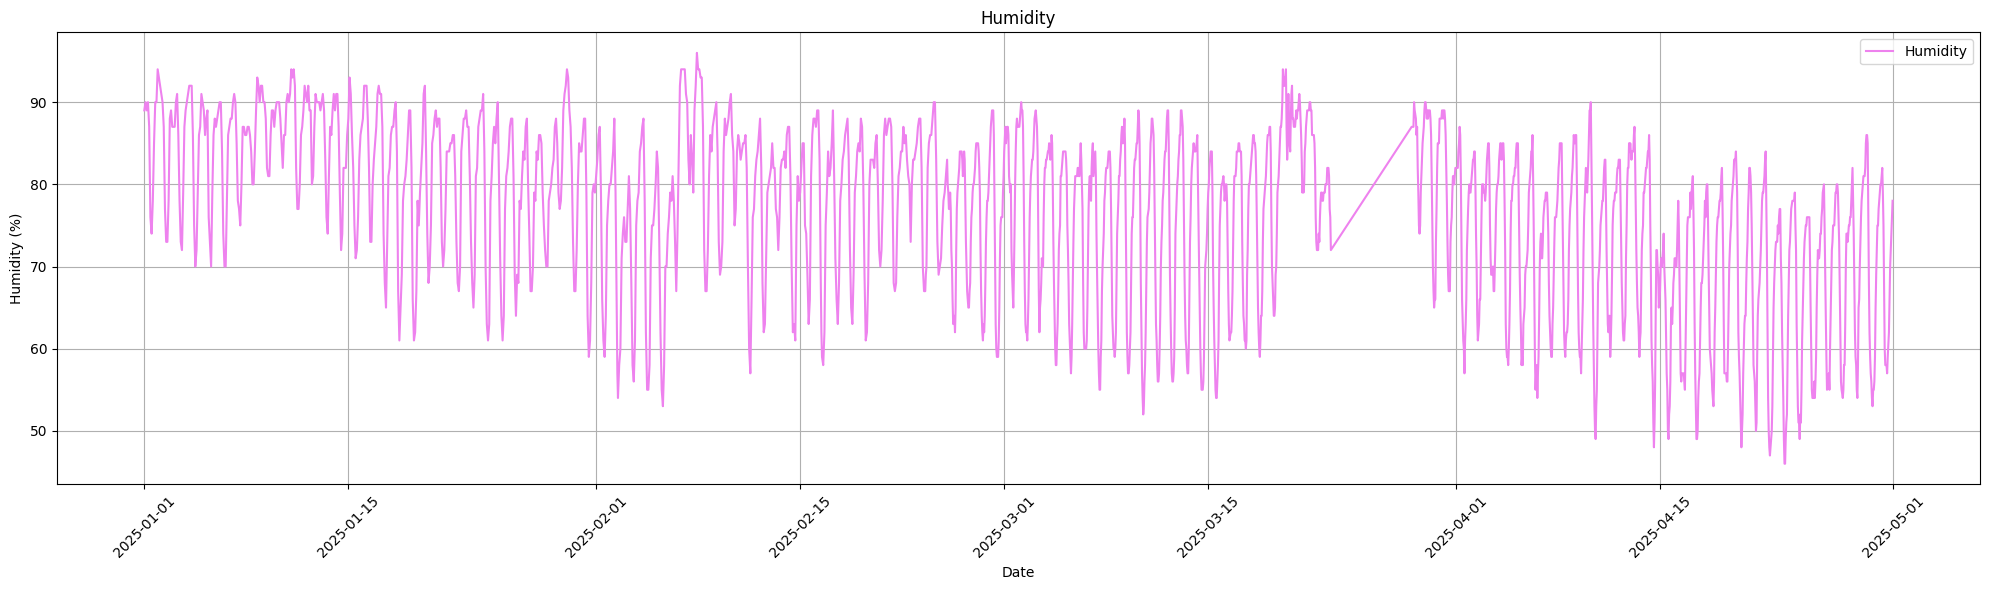

In [19]:
plt.figure(figsize=(20, 6))
plt.plot(df['datetime'], df['humidity'], label='Humidity', color='Violet')

plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Humidity')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Binning and Bar Plot

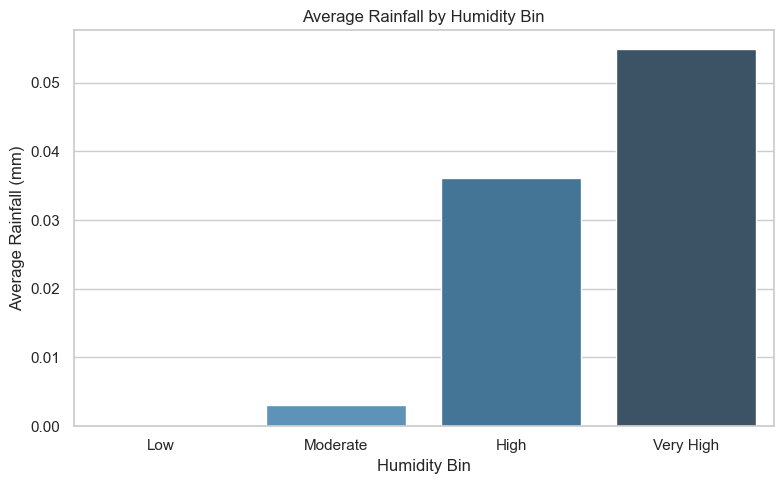

In [48]:
df['Hum_Bin'] = pd.cut(df['humidity'], bins=[-np.inf, 40, 60, 80, np.inf], labels=['Low', 'Moderate', 'High', 'Very High'])
sns.set(style="whitegrid")
rain_by_temp = df.groupby('Hum_Bin')['Rainfall'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=rain_by_temp, x='Hum_Bin', y='Rainfall', palette='Blues_d')
plt.title('Average Rainfall by Humidity Bin')
plt.xlabel('Humidity Bin')
plt.ylabel('Average Rainfall (mm)')
plt.tight_layout()
plt.show()

## Rainfall

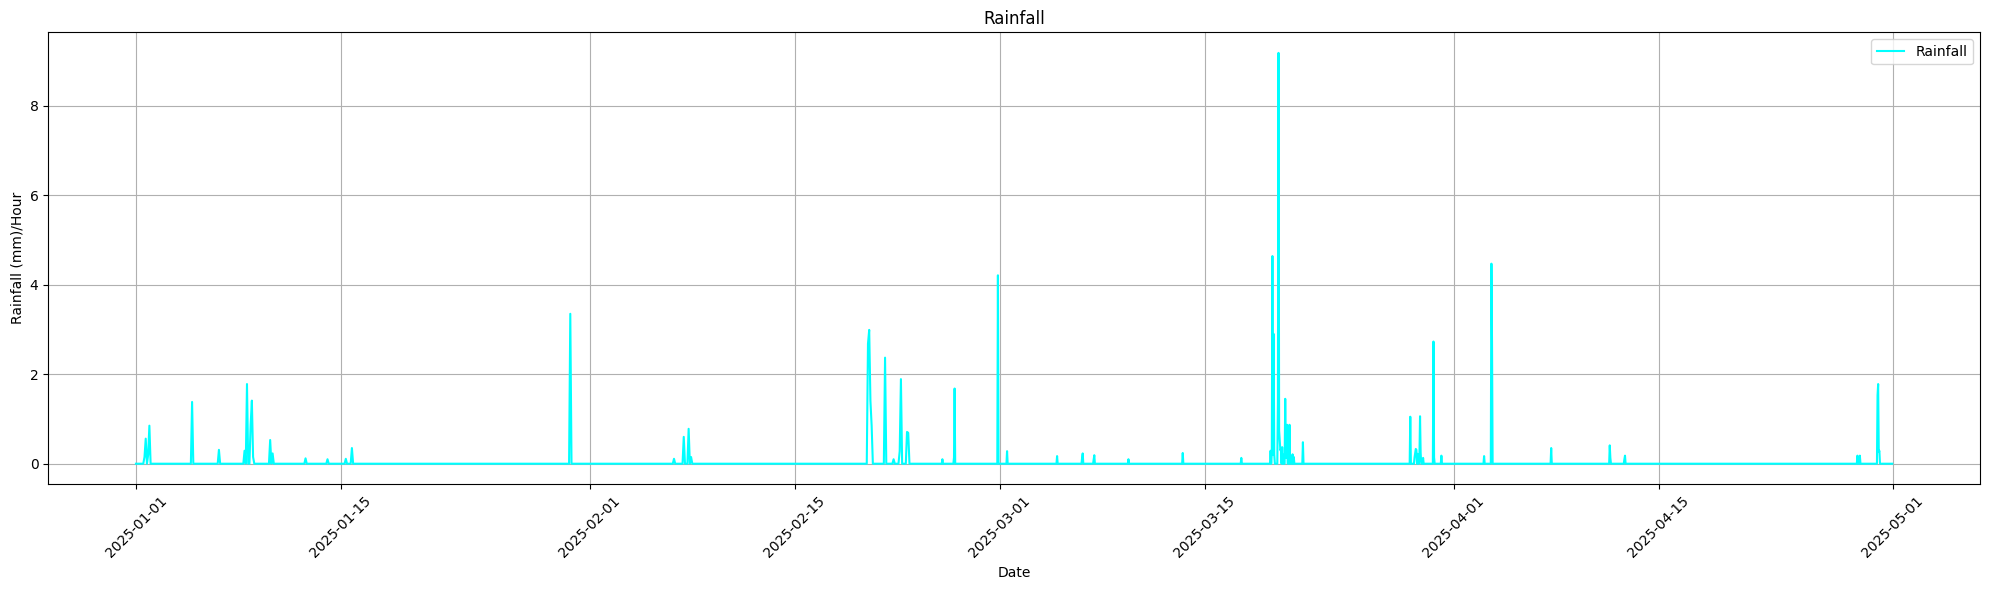

In [26]:
plt.figure(figsize=(20, 6))
plt.plot(df['datetime'], df['Rainfall'], label='Rainfall', color='cyan')

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)/Hour')
plt.title('Rainfall')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Binning and Bar Charts

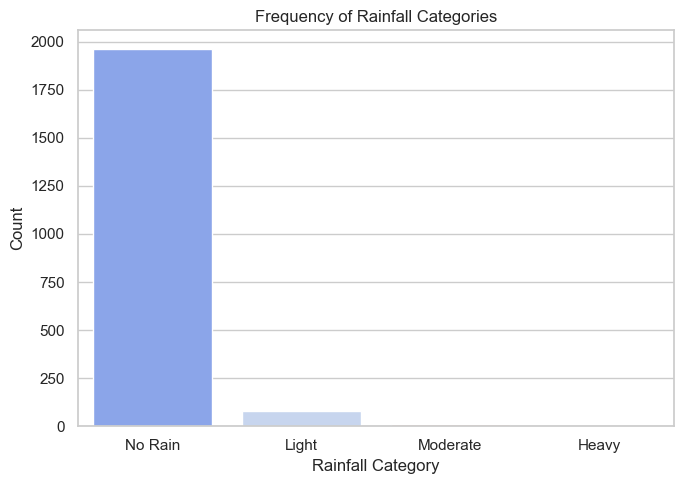

In [54]:
df['Rain_Bin'] = pd.cut(df['Rainfall'], bins=[-np.inf, 0.1, 2.5, 7.6, np.inf], labels=['No Rain', 'Light', 'Moderate', 'Heavy'])
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Rain_Bin', palette='coolwarm')
plt.title('Frequency of Rainfall Categories')
plt.xlabel('Rainfall Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Pressure

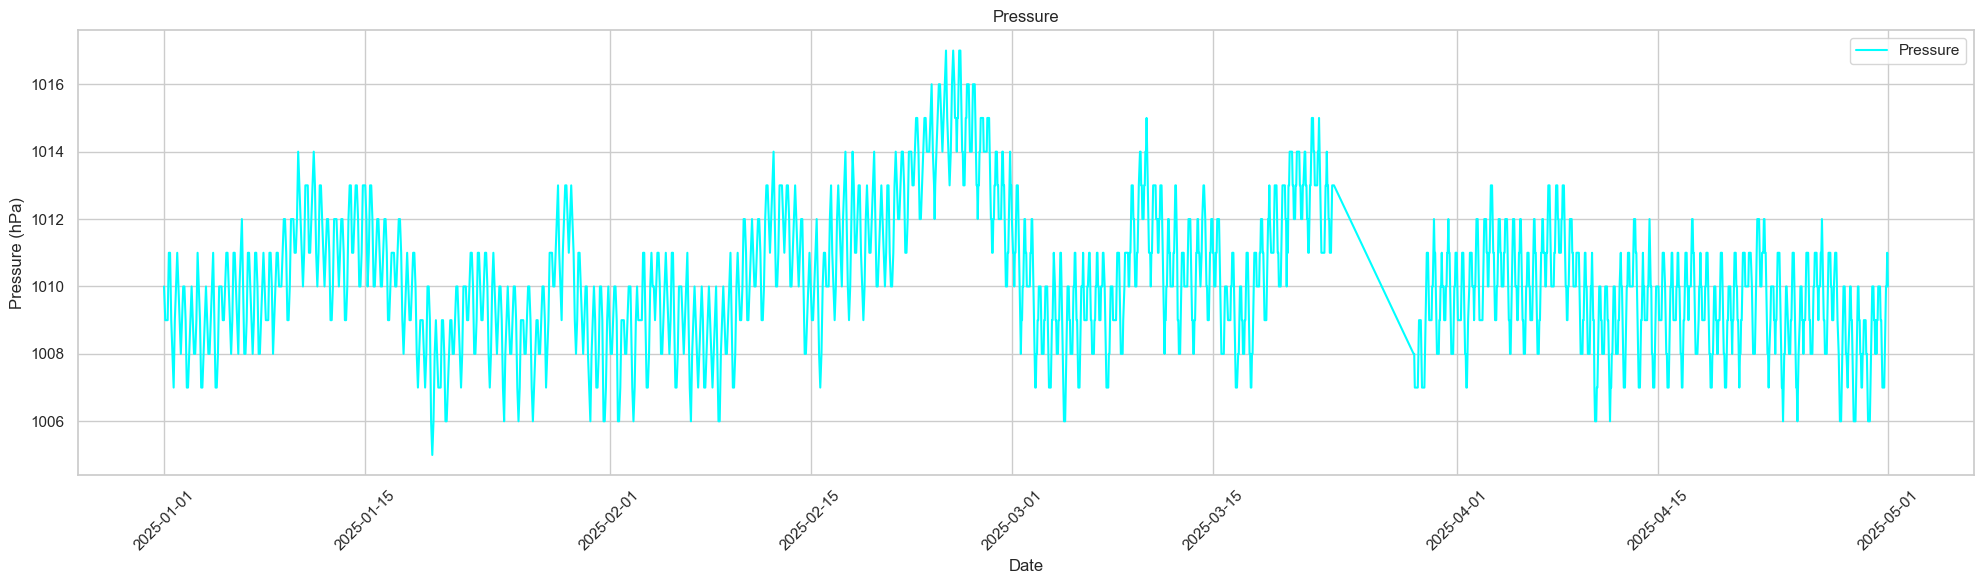

In [49]:
plt.figure(figsize=(20, 6))
plt.plot(df['datetime'], df['pressure'], label='Pressure', color='cyan')

plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Binning and Bar Plot

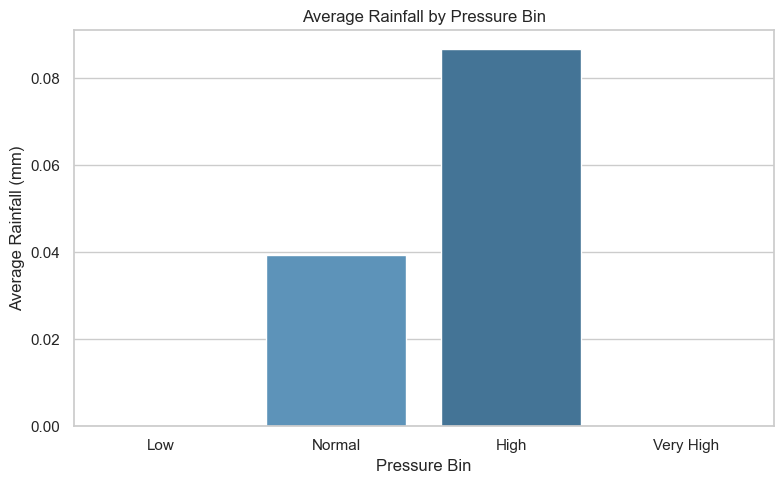

In [51]:
df['Pressure_Bin'] = pd.cut(df['pressure'], bins=[-np.inf, 1005, 1015, 1025, np.inf],labels=['Low', 'Normal', 'High', 'Very High'])
sns.set(style="whitegrid")
rain_by_temp = df.groupby('Pressure_Bin')['Rainfall'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=rain_by_temp, x='Pressure_Bin', y='Rainfall', palette='Blues_d')
plt.title('Average Rainfall by Pressure Bin')
plt.xlabel('Pressure Bin')
plt.ylabel('Average Rainfall (mm)')
plt.tight_layout()
plt.show()

## Cloudiness

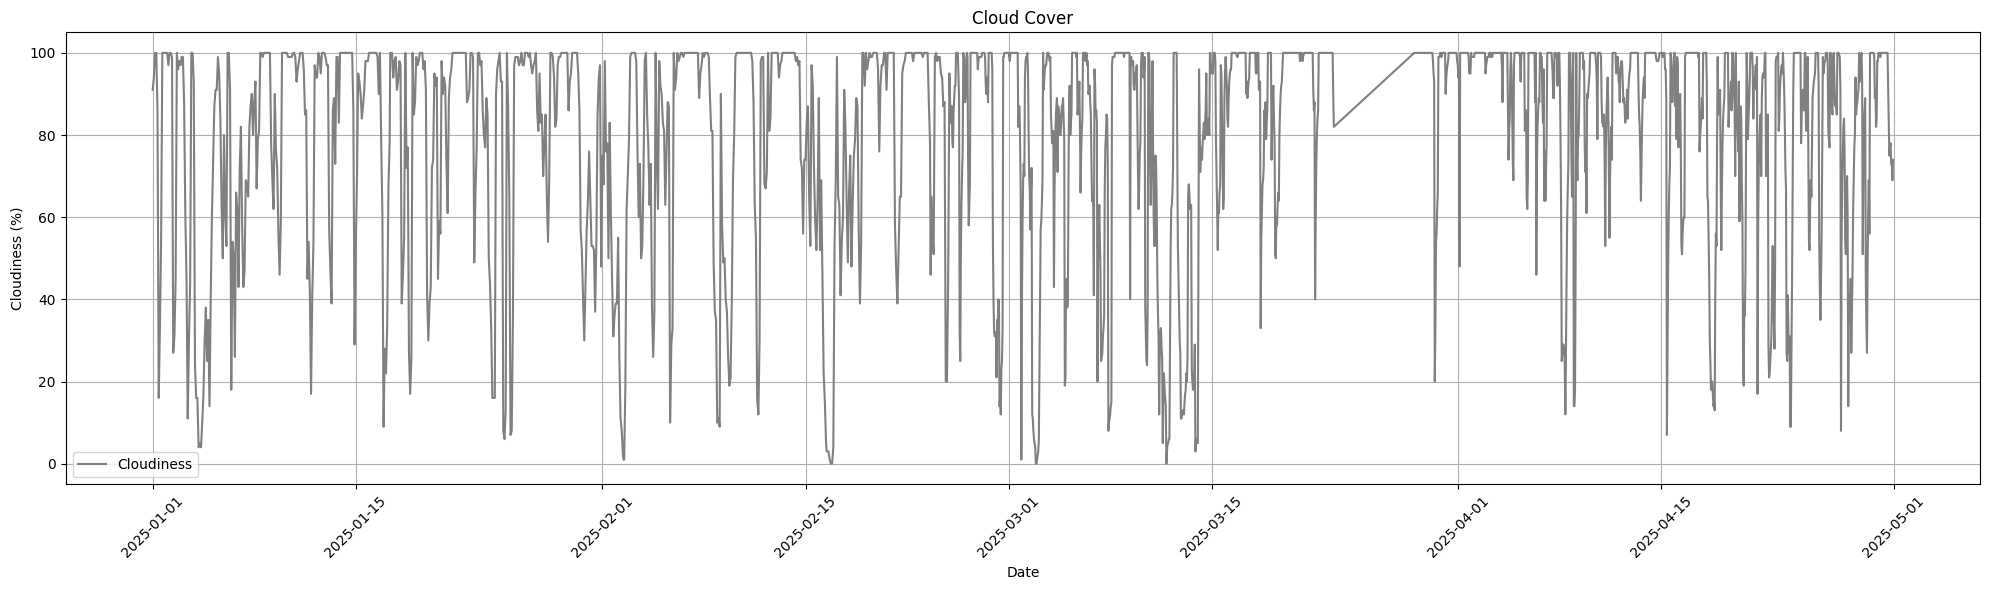

In [27]:
plt.figure(figsize=(20, 6))
plt.plot(df['datetime'], df['Cloudiness'], label='Cloudiness', color='Gray')

plt.xlabel('Date')
plt.ylabel('Cloudiness (%)')
plt.title('Cloud Cover')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Windspeed

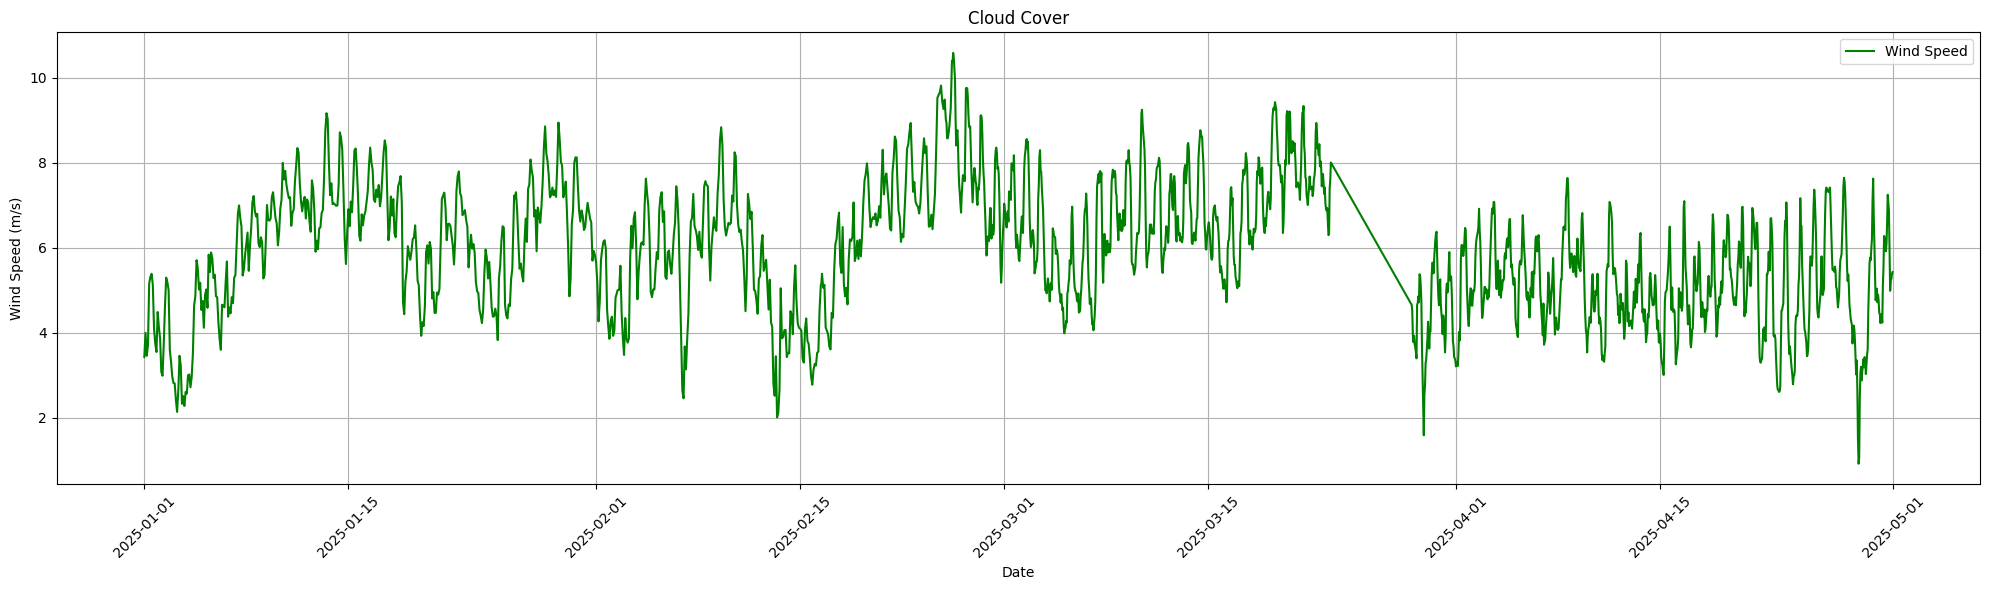

In [39]:
plt.figure(figsize=(20, 6))
plt.plot(df['datetime'], df['Wind Speed'], label='Wind Speed', color='Green')

plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.title('Cloud Cover')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Wind Speed depending on weather

<Axes: xlabel='weather', ylabel='Wind Speed'>

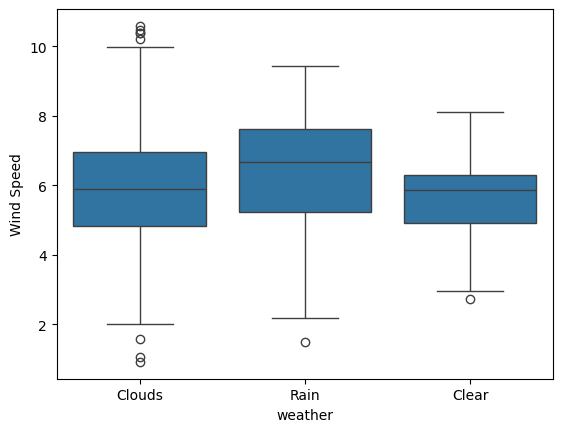

In [40]:
sns.boxplot(data=df, x='weather', y='Wind Speed')

### Binning and Bar Plot

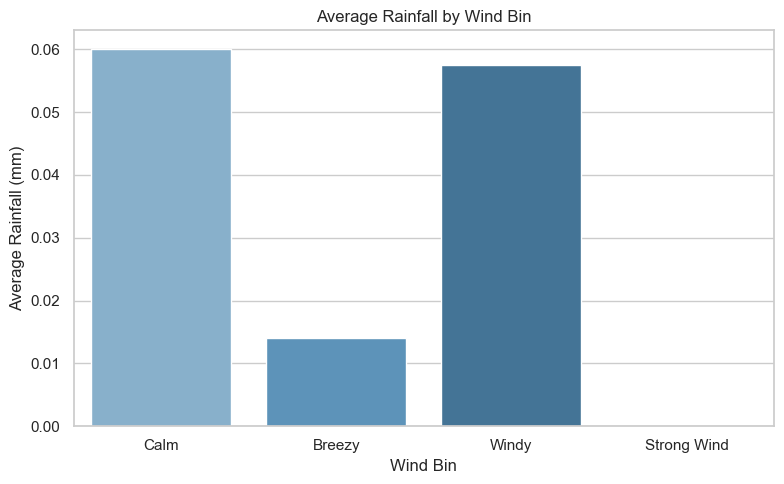

In [52]:
df['Wind_Bin'] = pd.cut(df['Wind Speed'],  bins=[-np.inf, 1.5, 5.5, 10.8, np.inf], labels=['Calm', 'Breezy', 'Windy', 'Strong Wind'])
sns.set(style="whitegrid")
rain_by_temp = df.groupby('Wind_Bin')['Rainfall'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=rain_by_temp, x='Wind_Bin', y='Rainfall', palette='Blues_d')
plt.title('Average Rainfall by Wind Bin')
plt.xlabel('Wind Bin')
plt.ylabel('Average Rainfall (mm)')
plt.tight_layout()
plt.show()

## Visibility

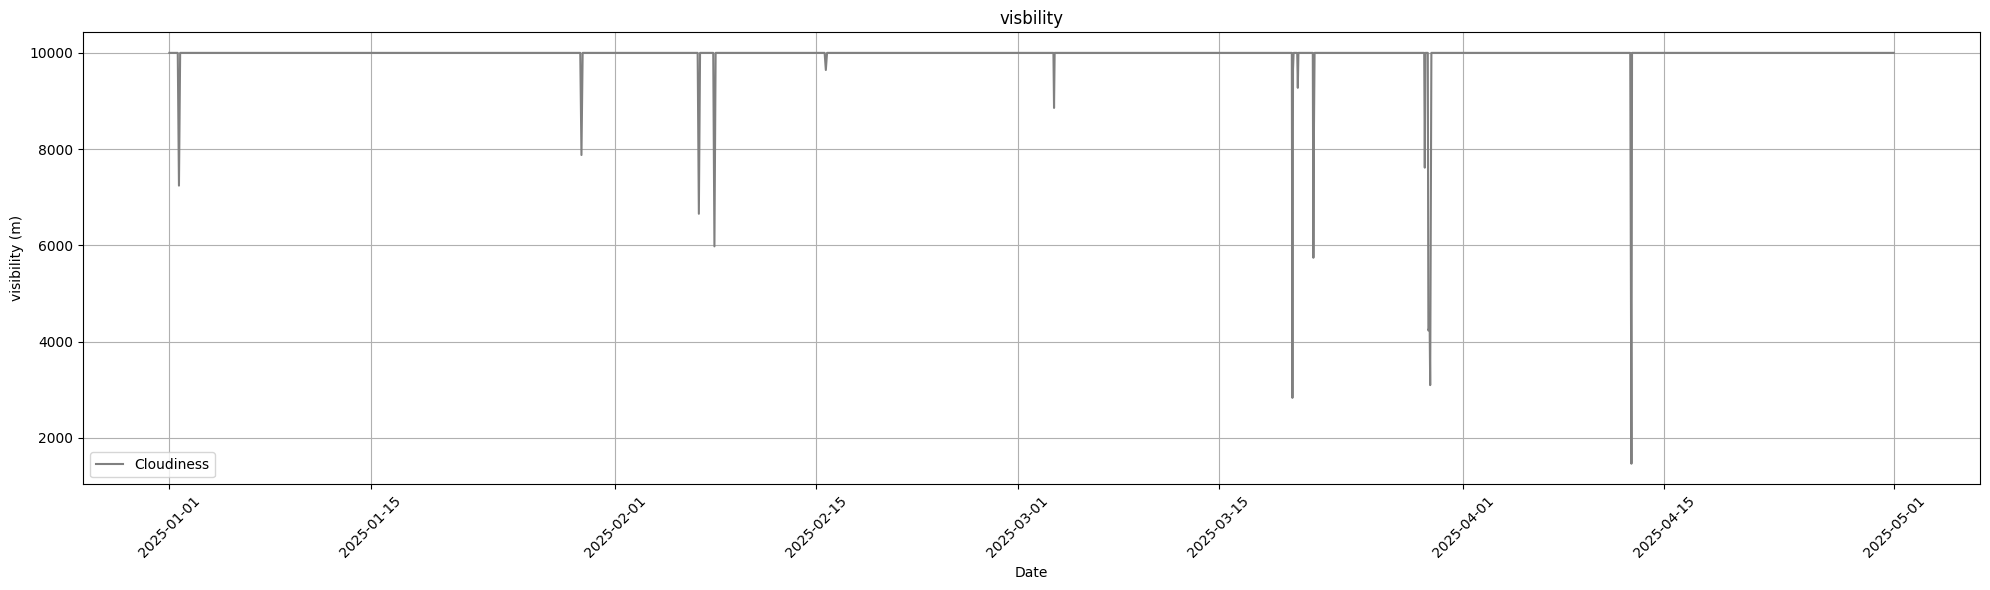

In [28]:
plt.figure(figsize=(20, 6))
plt.plot(df['datetime'], df['visibility'], label='Cloudiness', color='Gray')

plt.xlabel('Date')
plt.ylabel('visibility (m)')
plt.title('visbility')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Visibility vs Rainfall

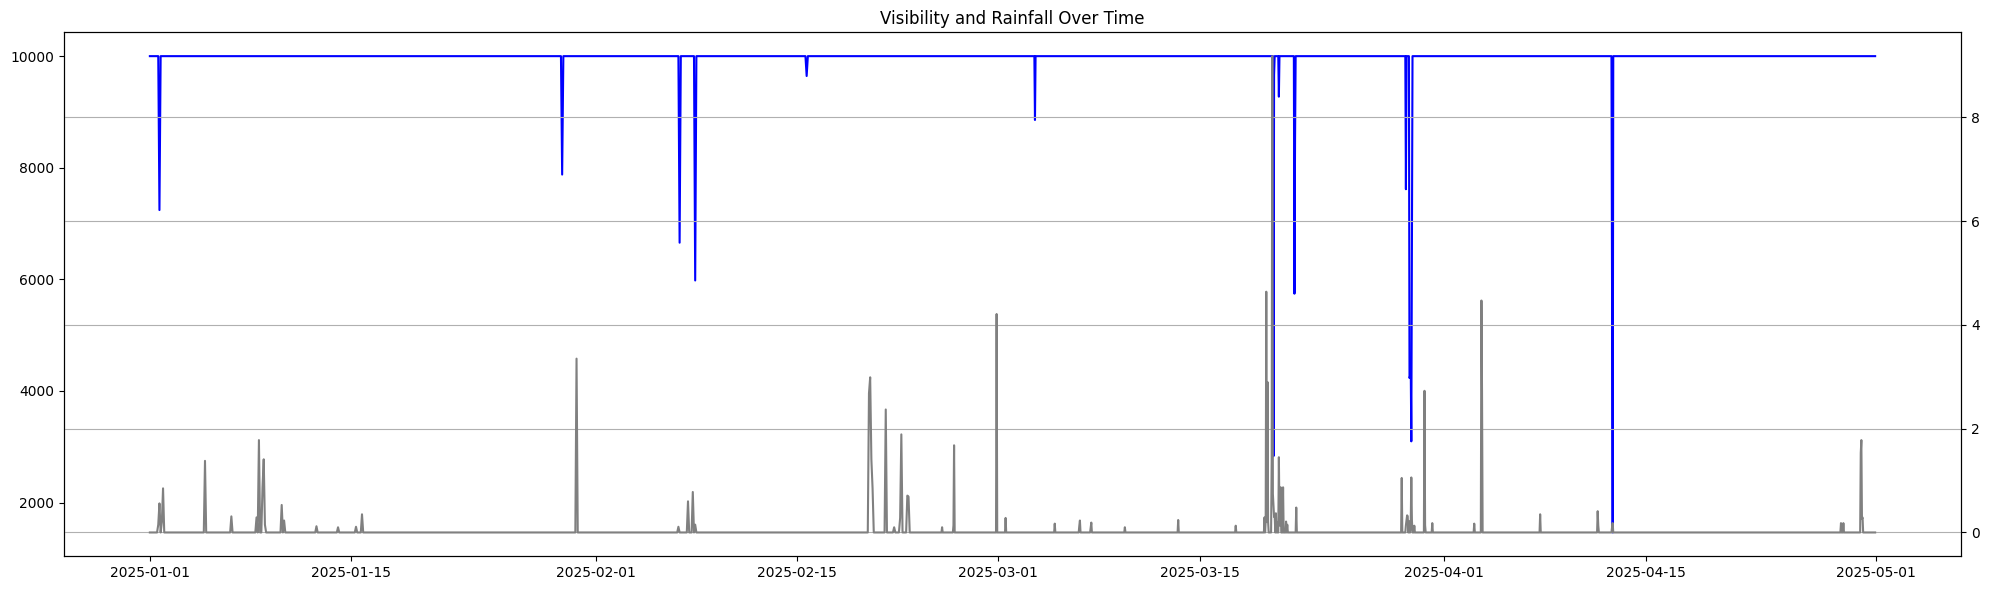

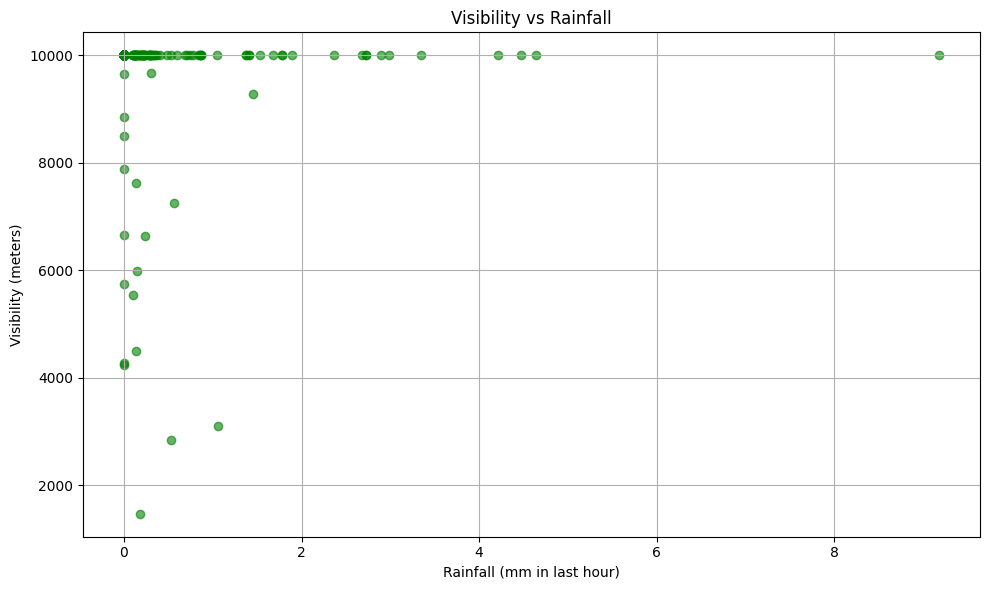

In [31]:
plt.figure(figsize=(20, 6))


plt.plot(df['datetime'], df['visibility'], label='Visibility (m)', color='blue')
plt.twinx()
plt.plot(df['datetime'], df['Rainfall'], label='Rainfall (mm)', color='gray')

plt.title('Visibility and Rainfall Over Time')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Rainfall'], df['visibility'], alpha=0.6, c='green')
plt.xlabel('Rainfall (mm in last hour)')
plt.ylabel('Visibility (meters)')
plt.title('Visibility vs Rainfall')
plt.grid(True)
plt.tight_layout()
plt.show()

## Temperature vs Humidity

### Scatterplot

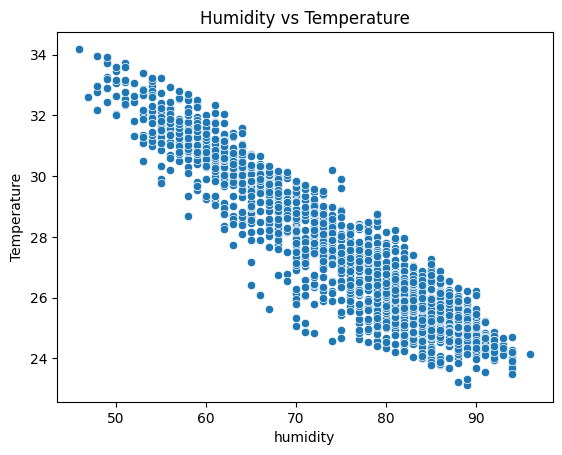

In [35]:
sns.scatterplot(data=df, x='humidity', y='Temperature')
plt.title('Humidity vs Temperature')
plt.show()

### With Weather

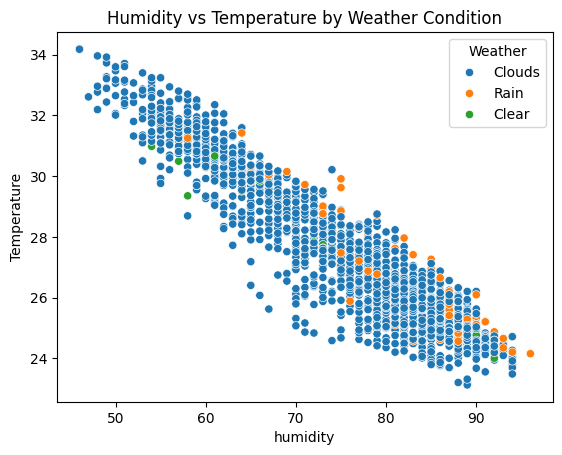

In [41]:
sns.scatterplot(data=df, x='humidity', y='Temperature', hue='weather')
plt.title('Humidity vs Temperature by Weather Condition')
plt.legend(title='Weather')
plt.show()

### Scatterplot of Humidity, Air Pressure, Temperature, and Weather

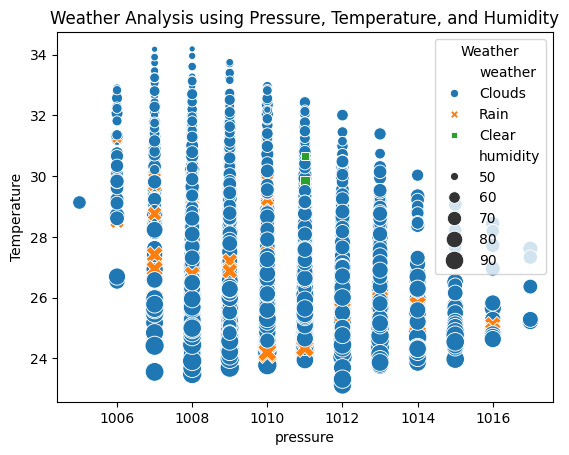

In [42]:
sns.scatterplot(data=df, x='pressure', y='Temperature', hue='weather', size='humidity', style='weather', sizes=(20, 200), palette='tab10')
plt.title('Weather Analysis using Pressure, Temperature, and Humidity')
plt.legend(title='Weather')
plt.show()

### Humidity Curve

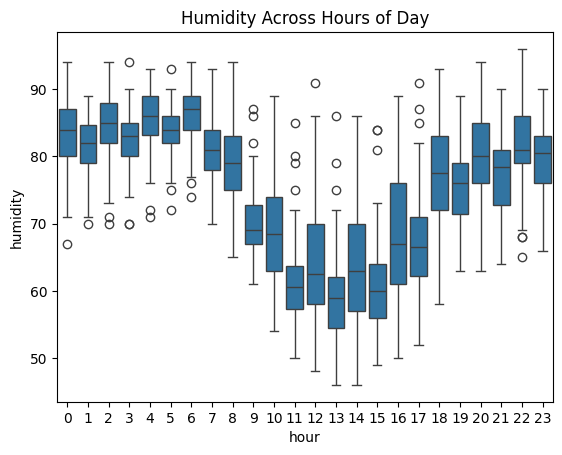

In [37]:
df['hour'] = df['datetime'].dt.hour
sns.boxplot(x='hour', y='humidity', data=df)
plt.title('Humidity Across Hours of Day')
plt.show()

## Wind Speed and Air Pressure

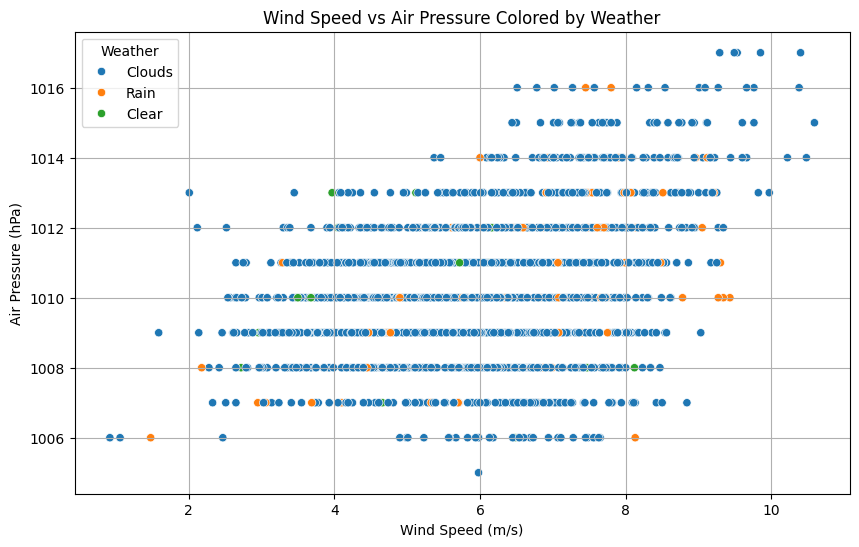

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='pressure', x='Wind Speed', hue='weather', palette='tab10')
plt.title('Wind Speed vs Air Pressure Colored by Weather')
plt.ylabel('Air Pressure (hPa)')
plt.xlabel('Wind Speed (m/s)')
plt.legend(title='Weather')
plt.grid(True)
plt.show()

## Humidity and Air Pressure

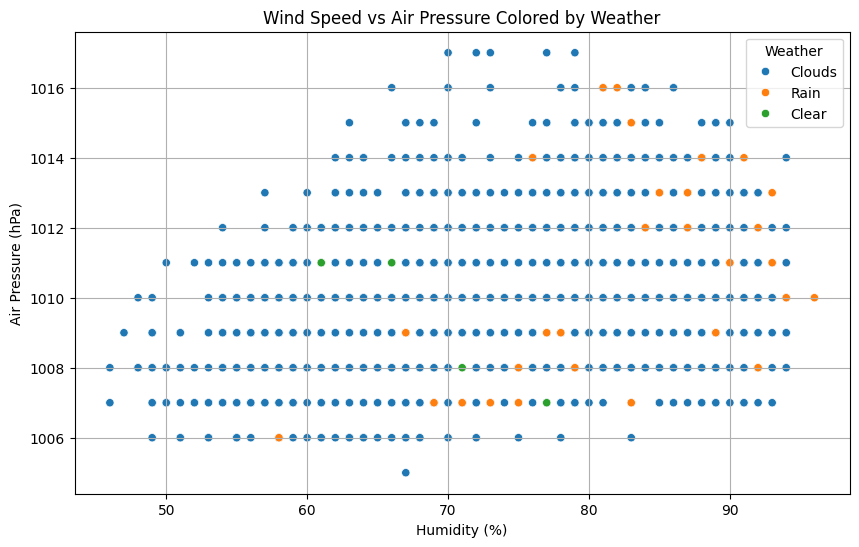

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='pressure', x='humidity', hue='weather', palette='tab10')
plt.title('Wind Speed vs Air Pressure Colored by Weather')
plt.ylabel('Air Pressure (hPa)')
plt.xlabel('Humidity (%)')
plt.legend(title='Weather')
plt.grid(True)
plt.show()

## Target Variable Analysis

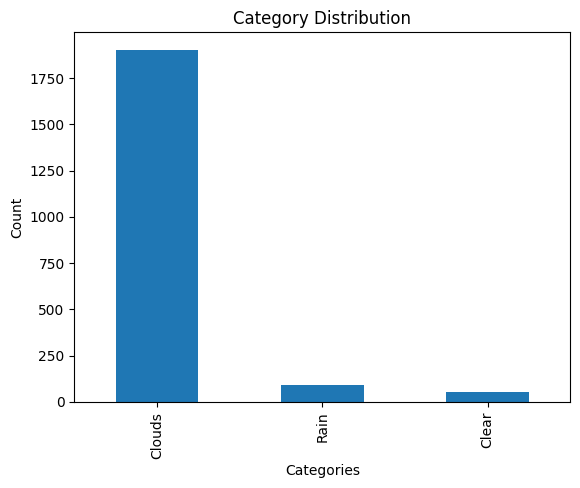

In [38]:
df['weather'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()